<a href="https://colab.research.google.com/github/DakshaNair226/SparkIntern/blob/main/Task4_Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DAKSHA** **NAIR**

**Data Science and Business Analytics**

**Intern @The Sparks Foundation**



# Exploratory Data Analysis (EDA) - **Terrorism**

**Dataset:** https://bit.ly/2TK5Xn5


* Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism
* As a security/defense analyst, try to find out the hot zone of terrorism.
* What all security issues and insights you can derive by EDA?






#**Part 1-** Basic Info

**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re
import datetime

**Loading and reading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Internship/globalterrorism.csv")
# pd.set_option('max_columns', 135)

**Listing out some Basic information about data**

*   **Top 10 rows**




In [ ]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,1.970010e+11,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Aut


*   **DataFrame Shape**



In [ ]:
data.shape

(181691, 135)


*   **Descriptive Analysis**




In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000


*   **Concise summary of a DataFrame**




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB



*   **Correlation in the DataFrame**


In [ ]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002705,0.018270,0.091762,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070647,0.002018,0.026216,-0.016788,0.298888,0.041345,0.093720,-0.082972,0.137742,0.074173,0.071981,0.189261,0.079080,0.048798,-0.019084,0.097622,0.111424,-0.082820,0.156176,0.090557,0.039083,0.040647,-0.066454,-0.177861,0.017939,-0.137406,0.428398,0.141600,0.110578,0.033922,0.038993,-0.318048,-0.146103,0.398722,-0.011716,0.101732,0.101044,0.041027,0.081354,0.090000,-0.138595,0.027102,0.015351,-0.013808,0.027580,0.015282,-0.029349,0.027904,-0.278927,-0.150676,-0.013498,-0.010146,0.006370,-0.010082,-0.493413,-0.169861,-0.241986,-0.009991,-0.017999,-0.014094,-0.165422,0.256114,-0.181613,-0.143600,-0.133252,-0.077851,-0.175606
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.041367,0.093736,-0.082963,0.137736,0.074153,0.072177,0.189454,0.079082,0.048794,-0.019068,0.097552,0.111364,-0.082784,0.155939,0.090345,0.038941,0.040656,-0.066417,-0.177591,0.017944,-0.137459,0.428278,0.141486,0.110542,0.034143,0.039172,-0.318815,-0.145529,0.398227,-0.011737,0.101727,0.101036,0.040990,0.081342,0.090267,-0.138298,0.026855,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.278916,-0.150690,-0.013490,-0.010159,0.006342,-0.010093,-0.493378,-0.169931,-0.241764,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002705,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.011762,-0.004422,-0.002845,0.003071,0.006705,-0.029027,-0.039298,-0.000948,0.001508,-0.004838,0.019584,0.016365,-0.006315,0.059489,0.052698,0.036580,-0.004460,-0.008286,-0.054490,-0.001661,0.014354,0.019890,0.023083,0.013361,-0.040736,-0.040042,0.147710,-0.156620,0.144738,0.007863,0.002142,0.000581,0.009567,-0.020514,-0.086445,-0.062079,0.058090,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.005816,0.001027,-0.003279,0.003397,0.011226,0.003746,-0.015730,0.002131,-0.070199,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018270,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.007817,-0.000395,-0.011802,0.003593,-0.005333,0.014498,-0.080422,-0.000052,-0.003184,0.003845,0.008964,0.011289,-0.017420,-0.056251,-0.044442,-0.018528,-0.002186,0.041395,-0.039794,-0.003788,-0.013527,0.003300,0.004474,0.003635,-0.031937,0.029723,0.149860,0.106259,0.029735,-0.003019,0.006182,0.017279,-0.005912,0.043226,-0.000417,-0.005110,0.073744,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.003903,-0.012729,-0.001093,0.004077,-0.020800,-0.002318,-0.036193,0.019856,0.001206,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091762,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,0.096563,-0.013440,0.073233,-0.033961,0.272272,-0.035143,-0.040606,0.011613,0.022996,0.013609,-0.031271,-0.014091,0.040233,0.032853,0.035114,0.014293,0.033464,-0.056545,-0.030


*   **Cleaning data - checking for missing values and the percentage of missing values**




In [ ]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
missing_percentage = data.isnull().sum()*100 /len(data)
print(missing_percentage)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64



*   **Column names in a Dataset**



In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

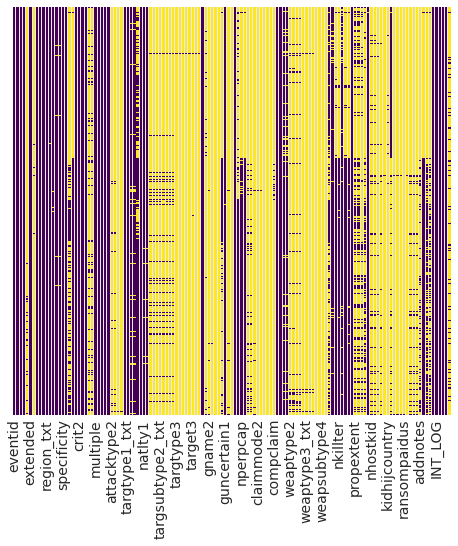

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#**PART 2-** Detailed Attack Info and Visulization

**Number of attacks each year**

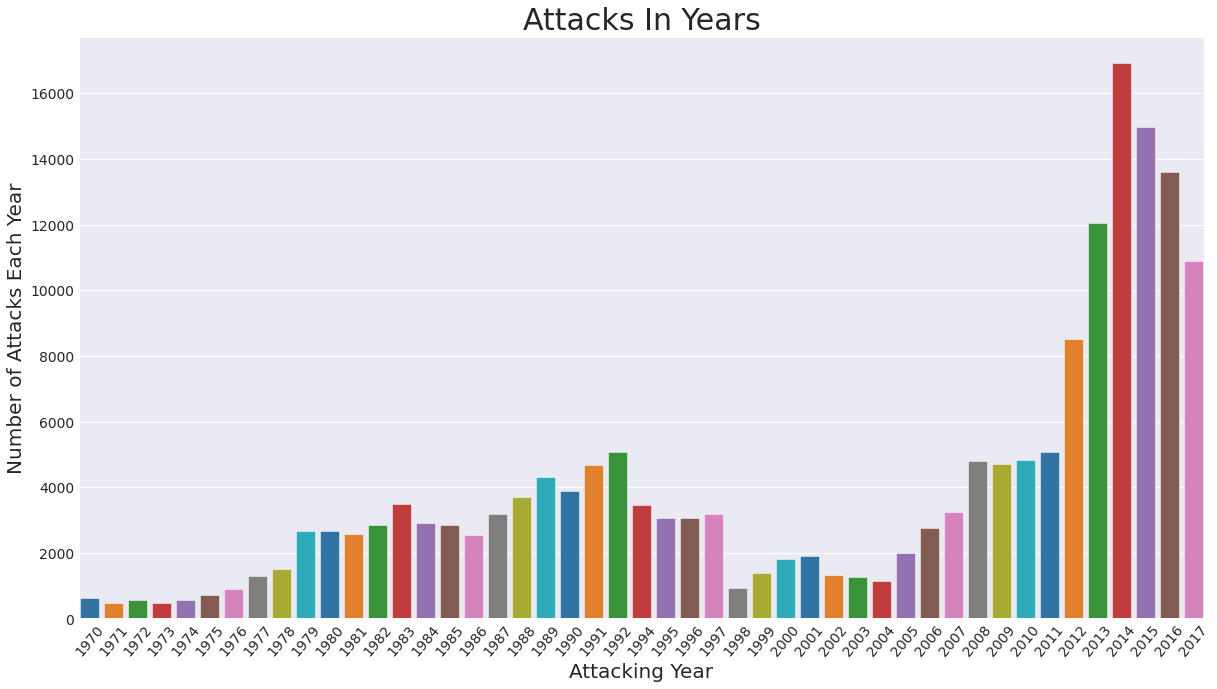

In [ ]:
year = data['iyear'].unique()
years_count = data['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

**Region and location wise frequency of attacks**

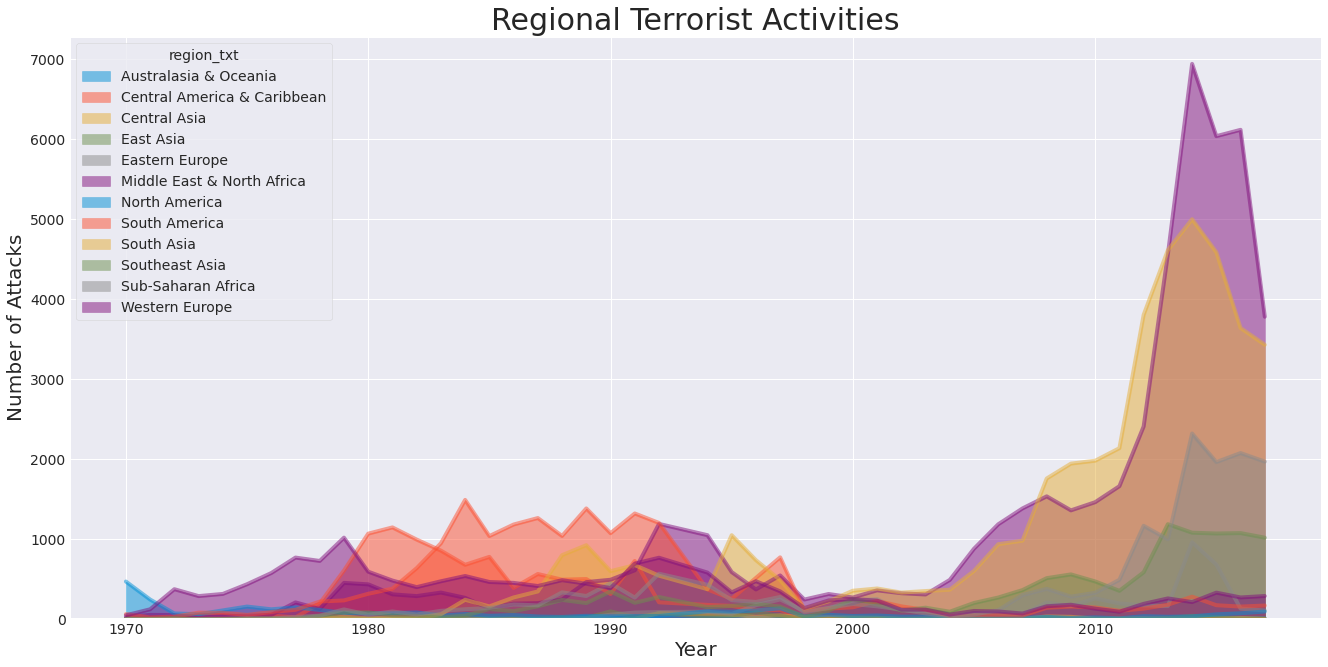

In [ ]:
pd.crosstab(data.iyear, data.region_txt).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Regional Terrorist Activities',fontsize=30)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [ ]:
attack = data.location.value_counts()[:10]
attack

The attack took place in Baghdad, Baghdad, Iraq.                                142
Belfast (Capital City)                                                           98
The incident occurred at the Donetsk Sergey Prokofiev International Airport.     62
Manhattan                                                                        60
The attack took place in Mosul, Ninawa, Iraq.                                    51
The incident occurred in the Balad Ruz district.                                 48
The incident occurred in the Shaab area of Adhamiyah neighborhood                40
The incident occurred in the Al-Faris district.                                  39
The attack took place in Kirkuk, At Ta'mim, Iraq.                                39
The incident occurred in the Hayy ath-Thawrah neighborhood.                      38
Name: location, dtype: int64

**City wise attack frequency**

In [ ]:
data.city.value_counts()[1:10]

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

**Country wise attack frequency**

In [ ]:
attack = data.country_txt.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

**Top significantly affected cities**

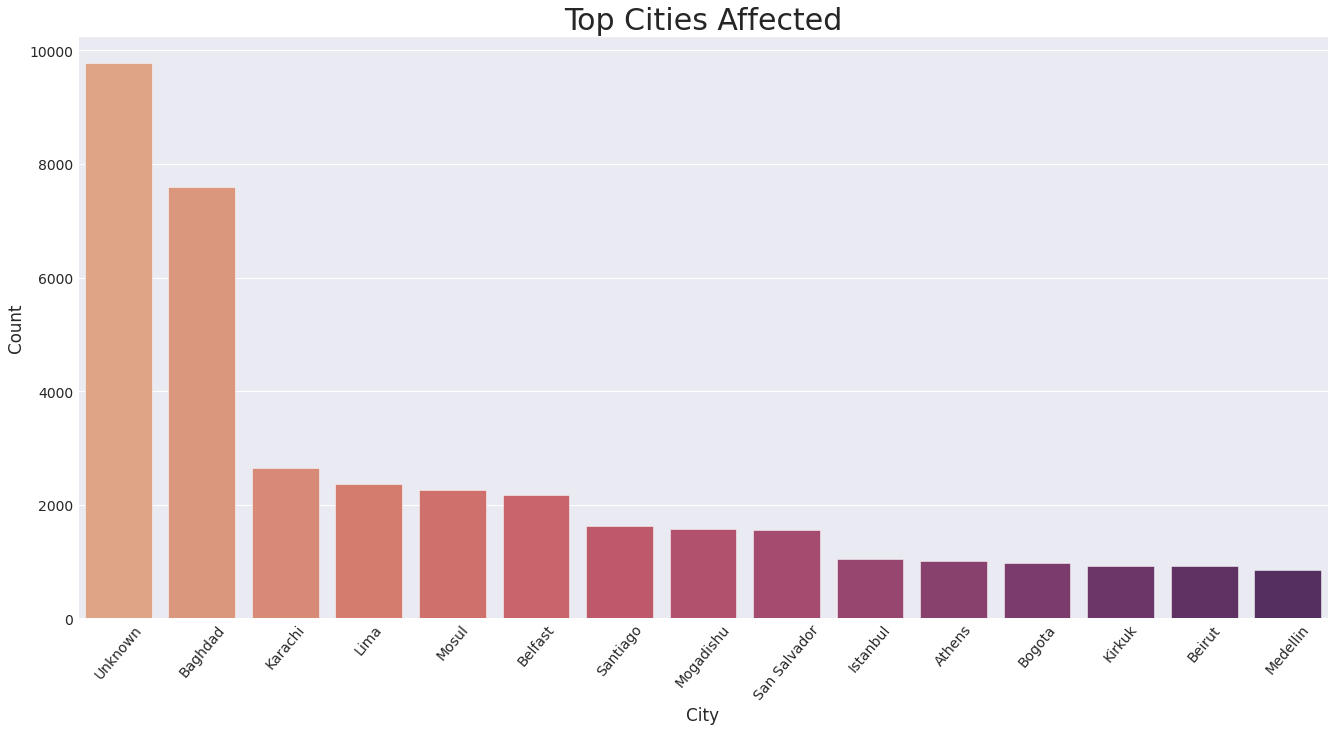

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['city'].value_counts()[:15].index,data['city'].value_counts()[:15].values,palette='flare')
plt.title('Top Cities Affected', fontsize=30)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

**Top Provinces significantly affected**

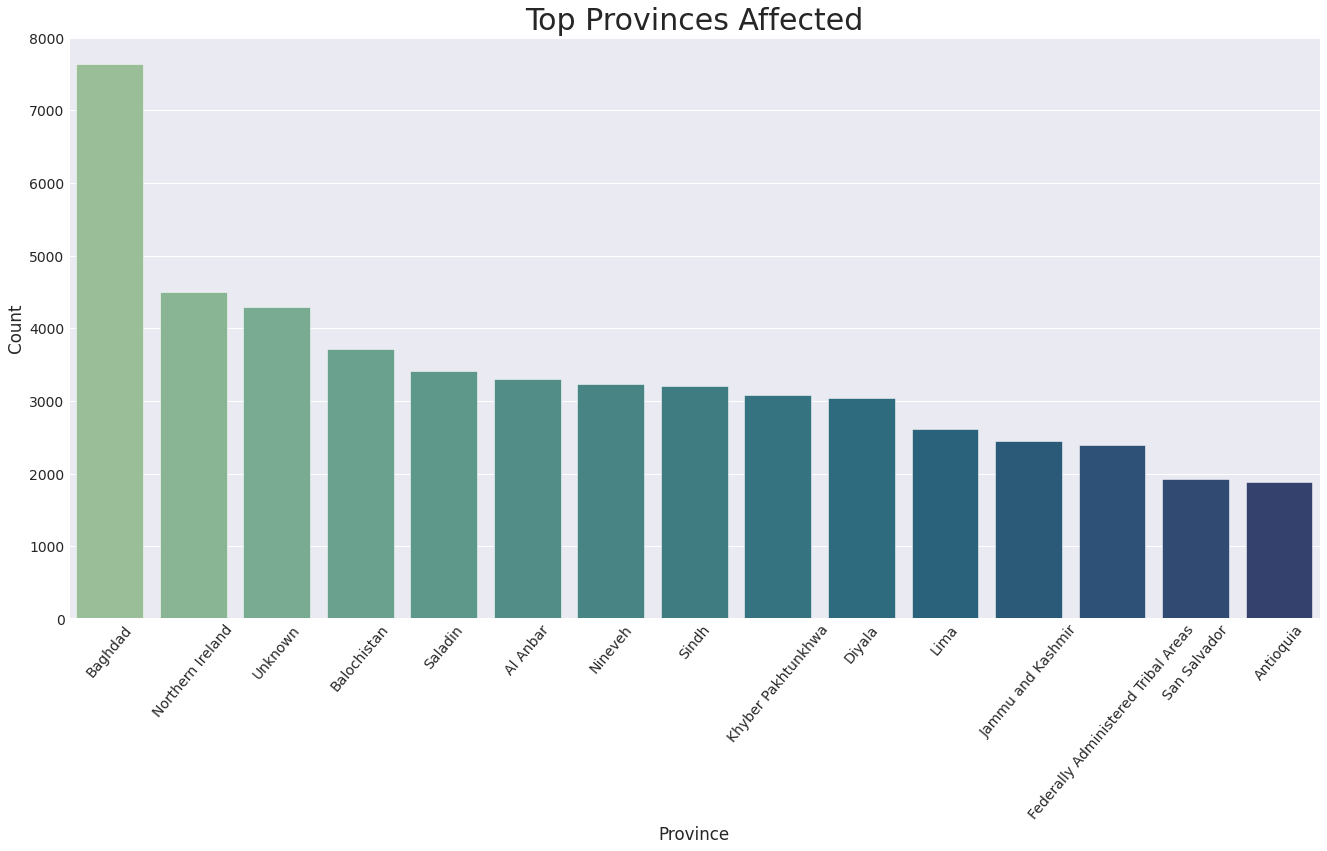

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['provstate'].value_counts()[:15].index,data['provstate'].value_counts()[:15].values,palette='crest')
plt.title('Top Provinces Affected', fontsize=30)
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

**Number of deaths due to attack**

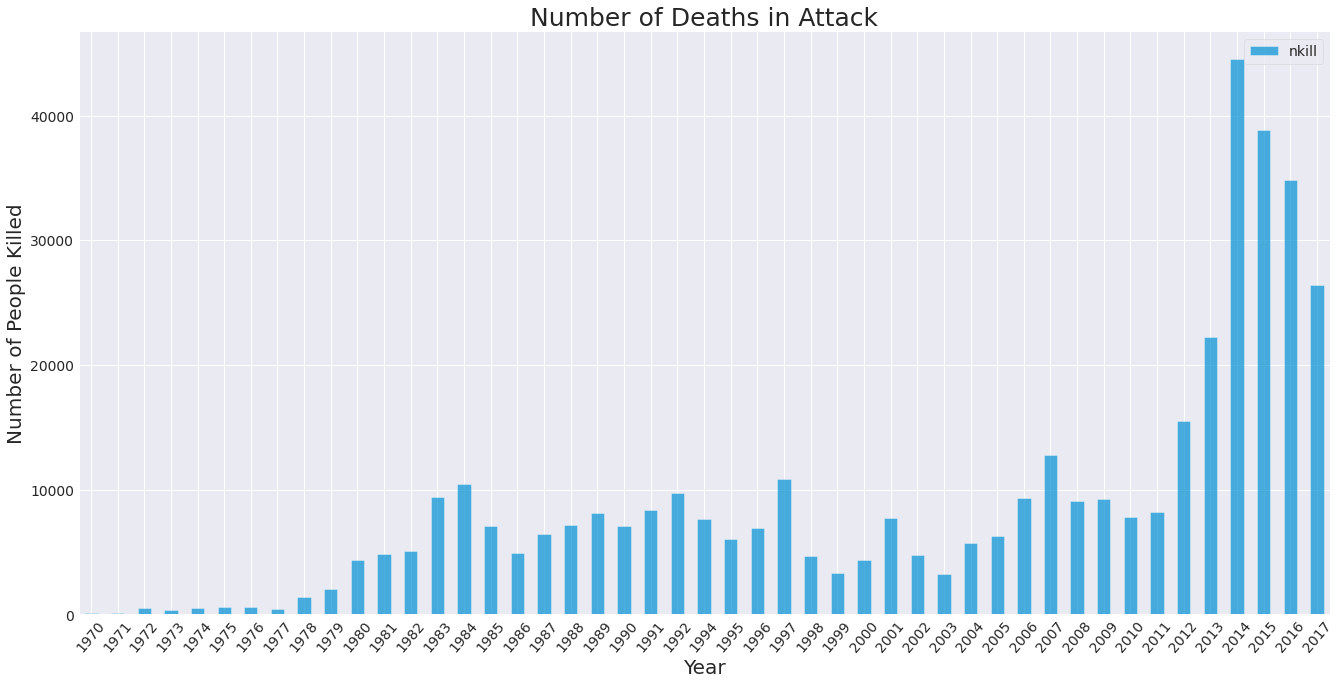

In [ ]:
df = data[['iyear','nkill']].groupby(['iyear']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("Number of Deaths in Attack",fontsize=25)
plt.ylabel("Number of People Killed",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

**Confirmed fatal and non-fatal injuries**

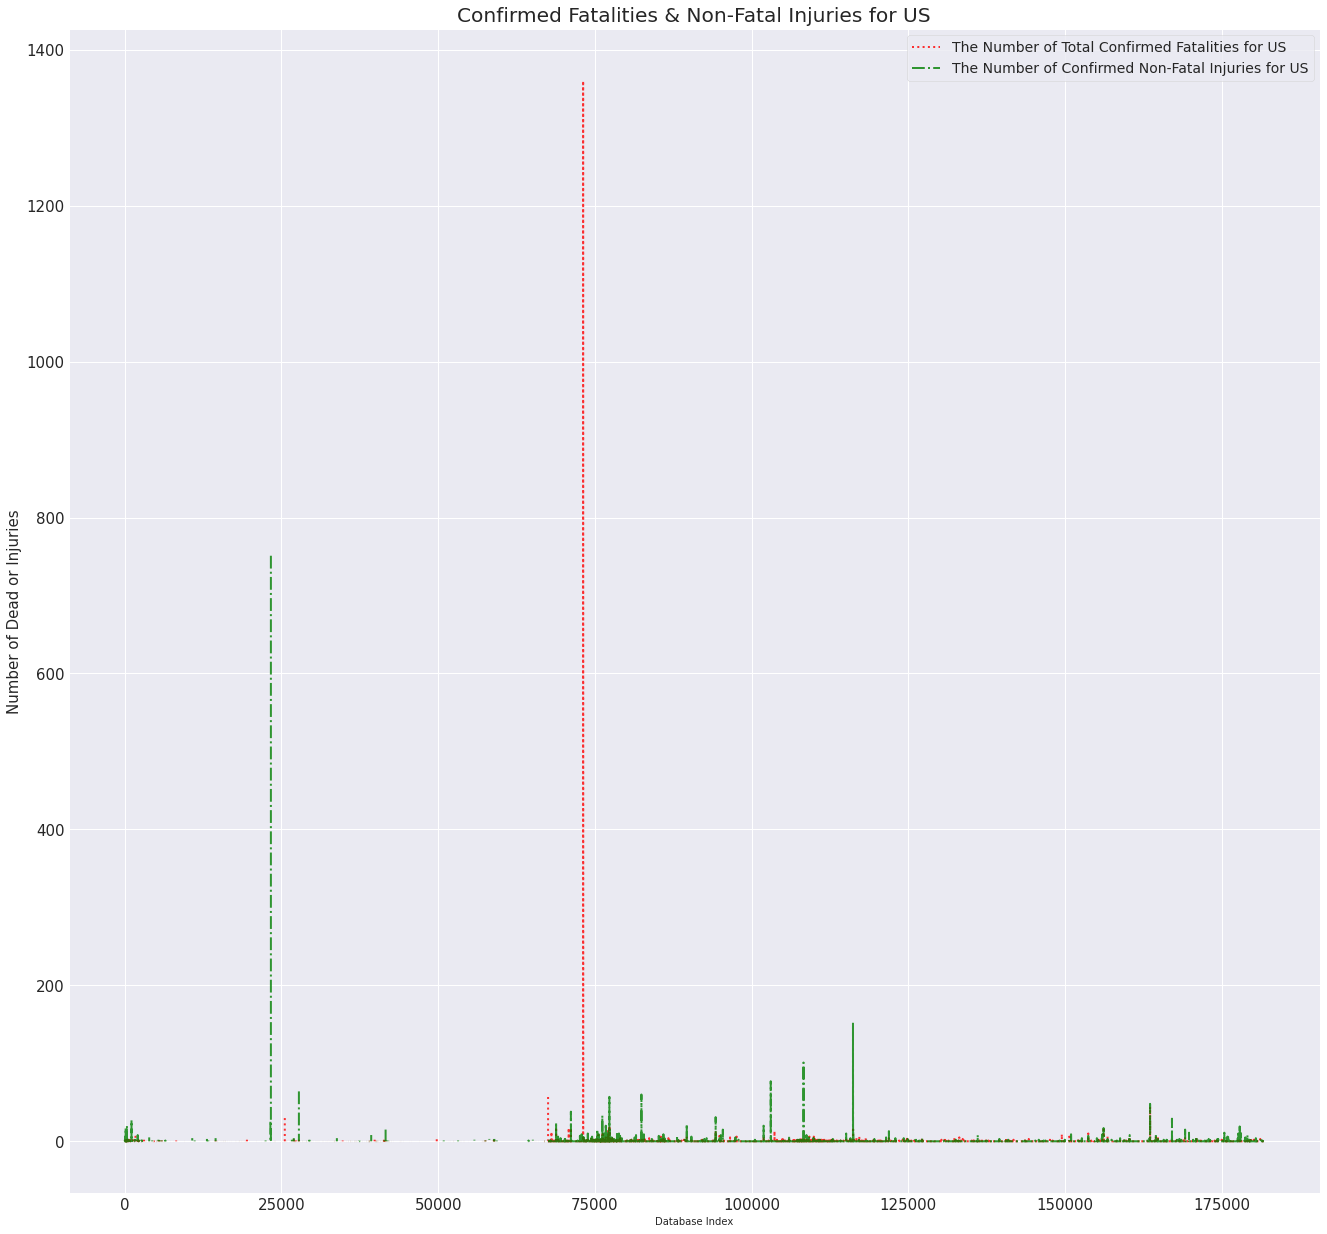

In [ ]:
data.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
data.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

**Total people killed in terror attack**

In [ ]:
DeathData = data.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [ ]:
AttackData = data.loc[:,'attacktype1':'attacktype1_txt']
typeDeathData = pd.concat([AttackData, DeathData], axis=1)

**Types of attack**

In [ ]:
typeDeathFormatData = typeDeathData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeDeathFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [ ]:
typeDeathFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


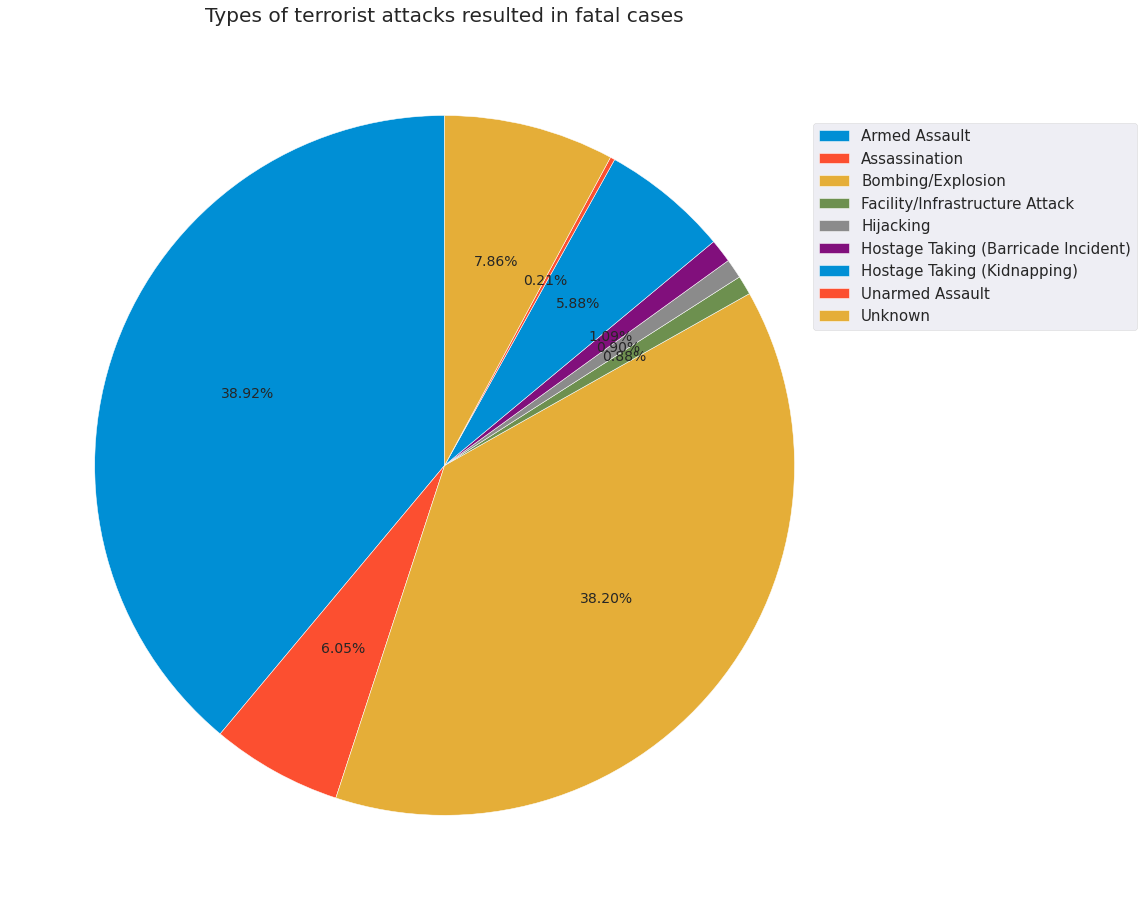

In [ ]:
labels = typeDeathFormatData.columns.tolist() # convert line to list
transpoze = typeDeathFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks resulted in fatal cases')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) 
plt.show()

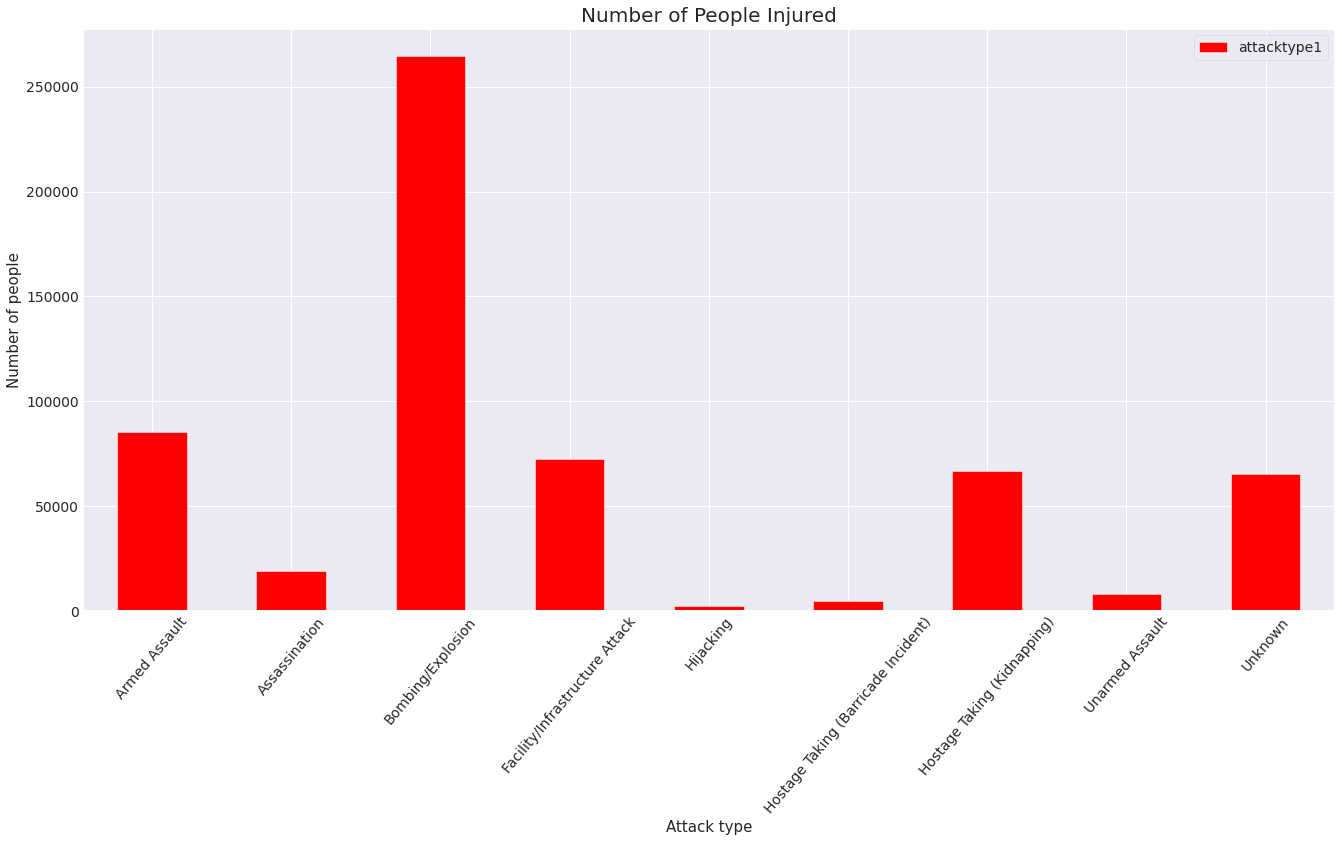

In [ ]:
data[['attacktype1_txt','attacktype1']].groupby(["attacktype1_txt"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['red'])
plt.xticks(rotation=50)
plt.title("Number of People Injured",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

**Most significant target type**

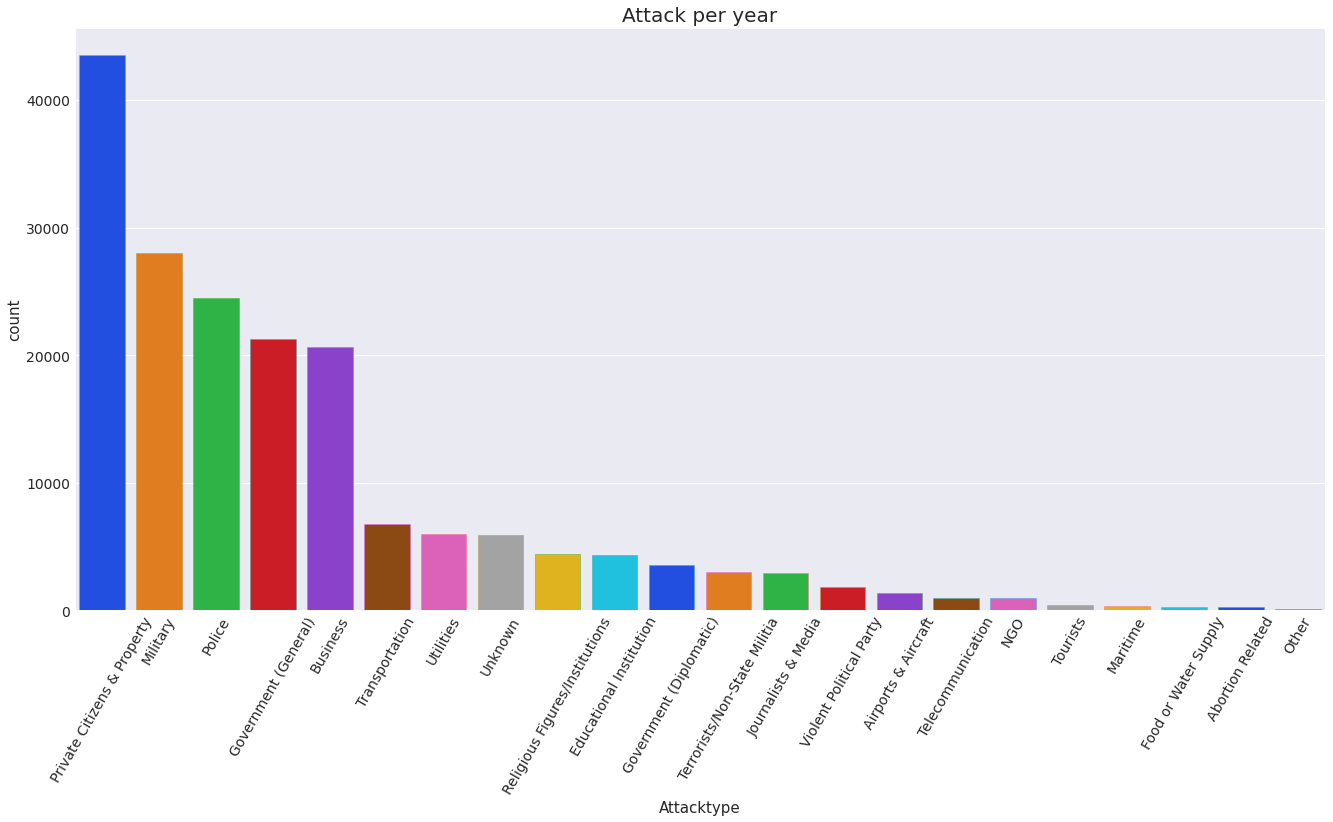

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(data["targtype1_txt"],order=data['targtype1_txt'].value_counts().index,palette="bright",edgecolor=sns.color_palette("husl"));
plt.xticks(rotation=60)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

In [ ]:
countryData = data.loc[:,'country':'country_txt']
# countyData
countryDeathData = pd.concat([countryData, DeathData], axis=1)

In [ ]:
countryDeathFormatData = countryDeathData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryDeathFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,...,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [ ]:
CountryDeathFormatData.info()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Dominican Republic  1 non-null      float64
 1   Greece              1 non-null      float64
 2   Japan               1 non-null      float64
 3   Mexico              1 non-null      float64
 4   Philippines         1 non-null      float64
dtypes: float64(5)
memory usage: 48.0+ bytes


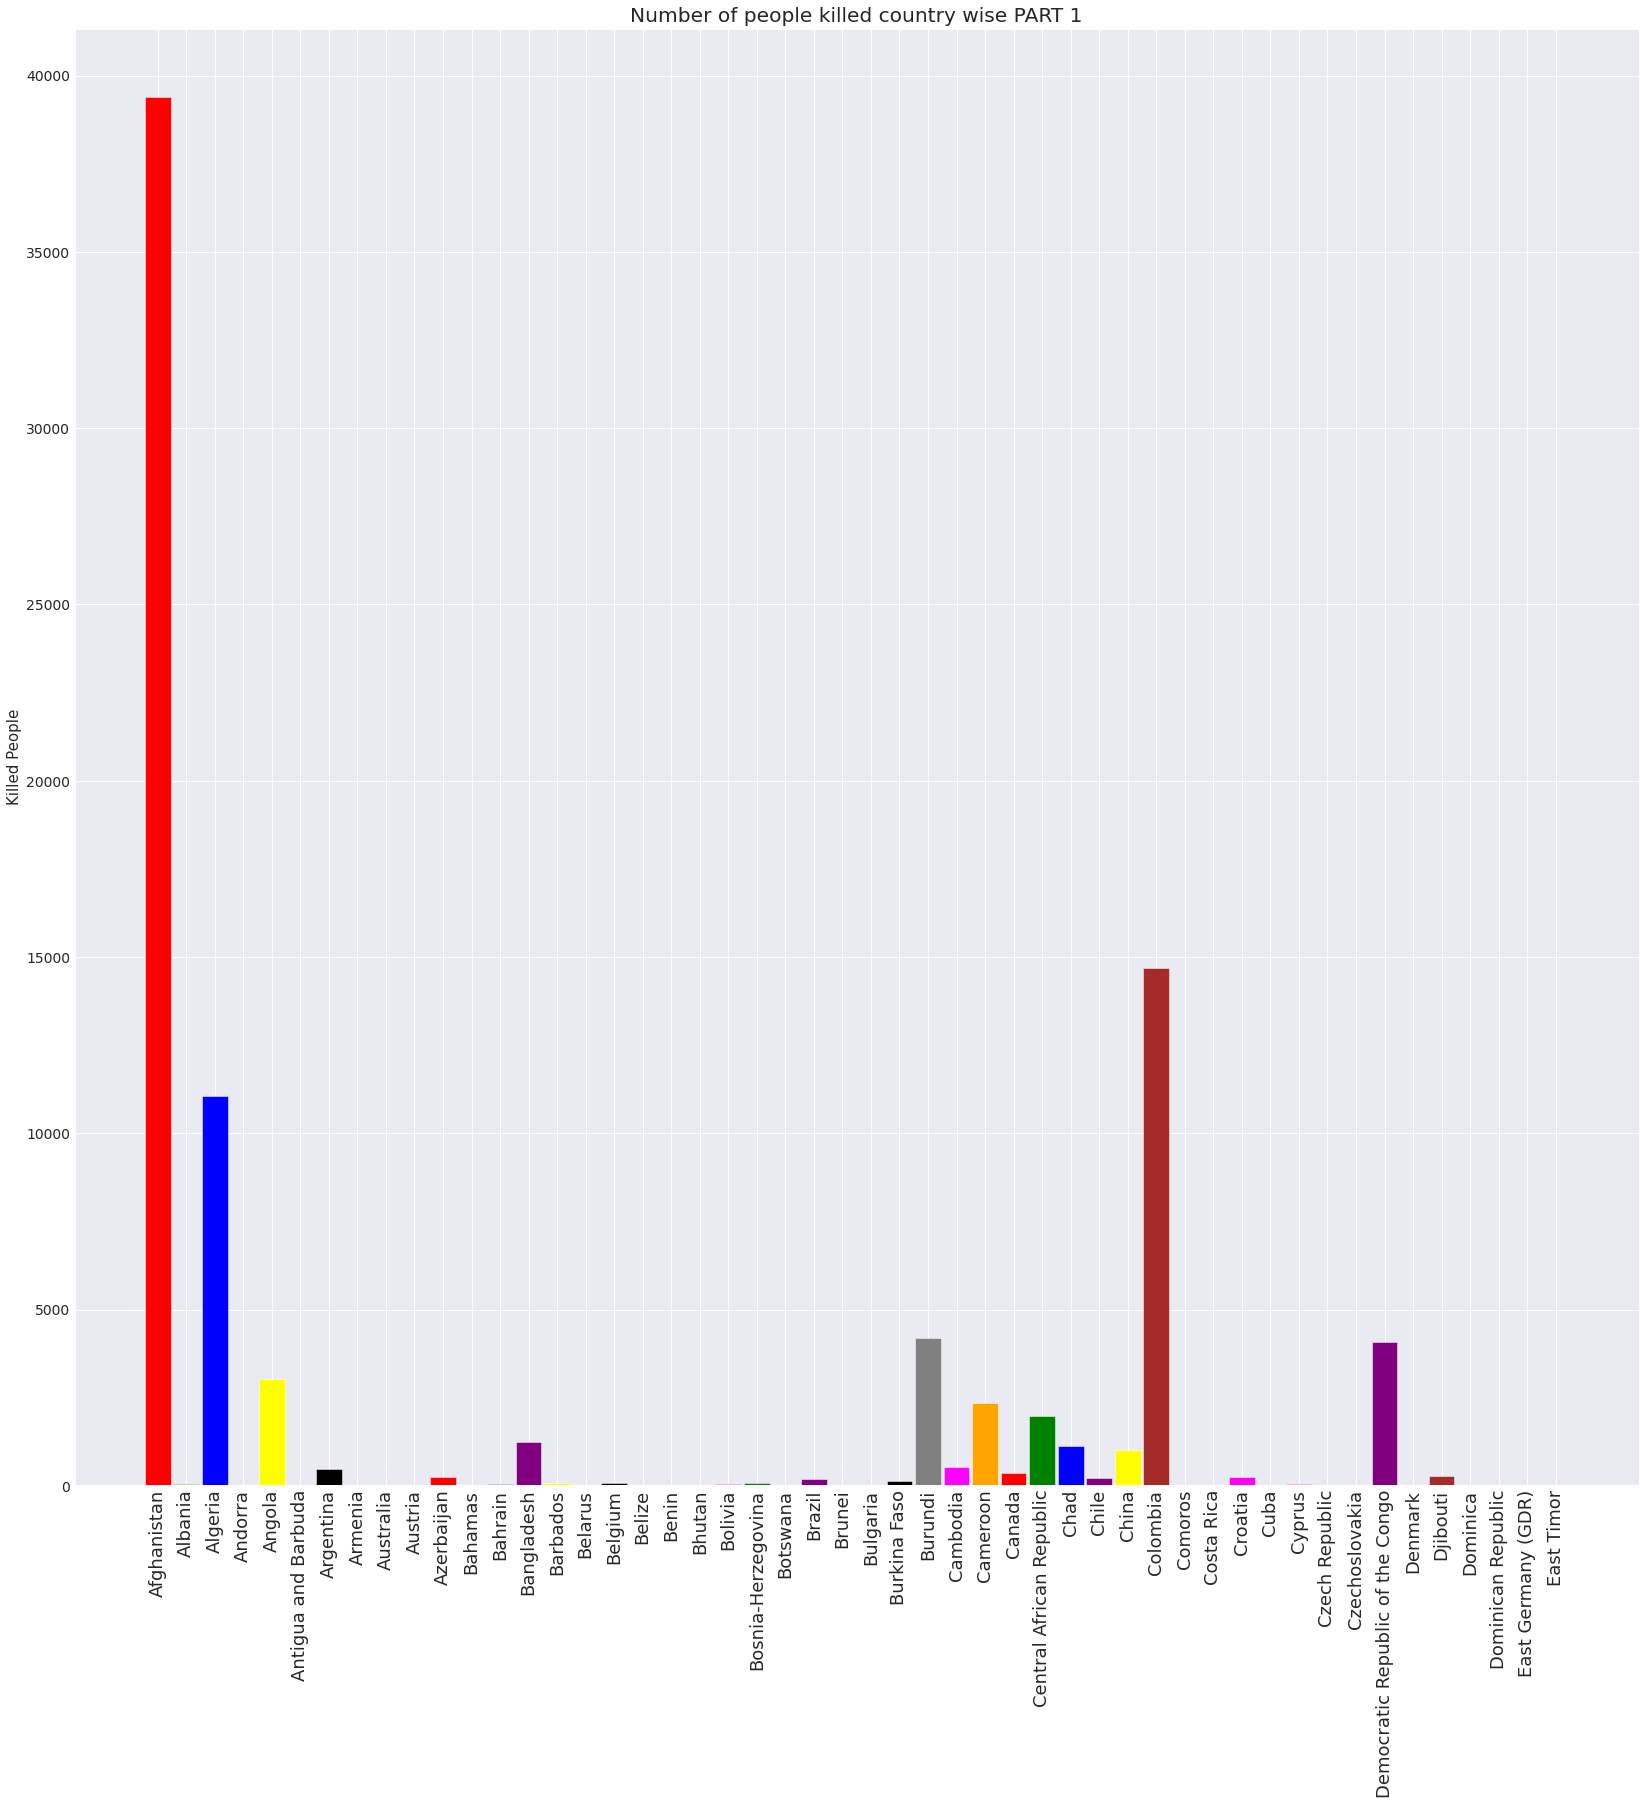

In [ ]:

labels = countryDeathFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryDeathFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed country wise PART 1')
# print(fig_size)
plt.show()

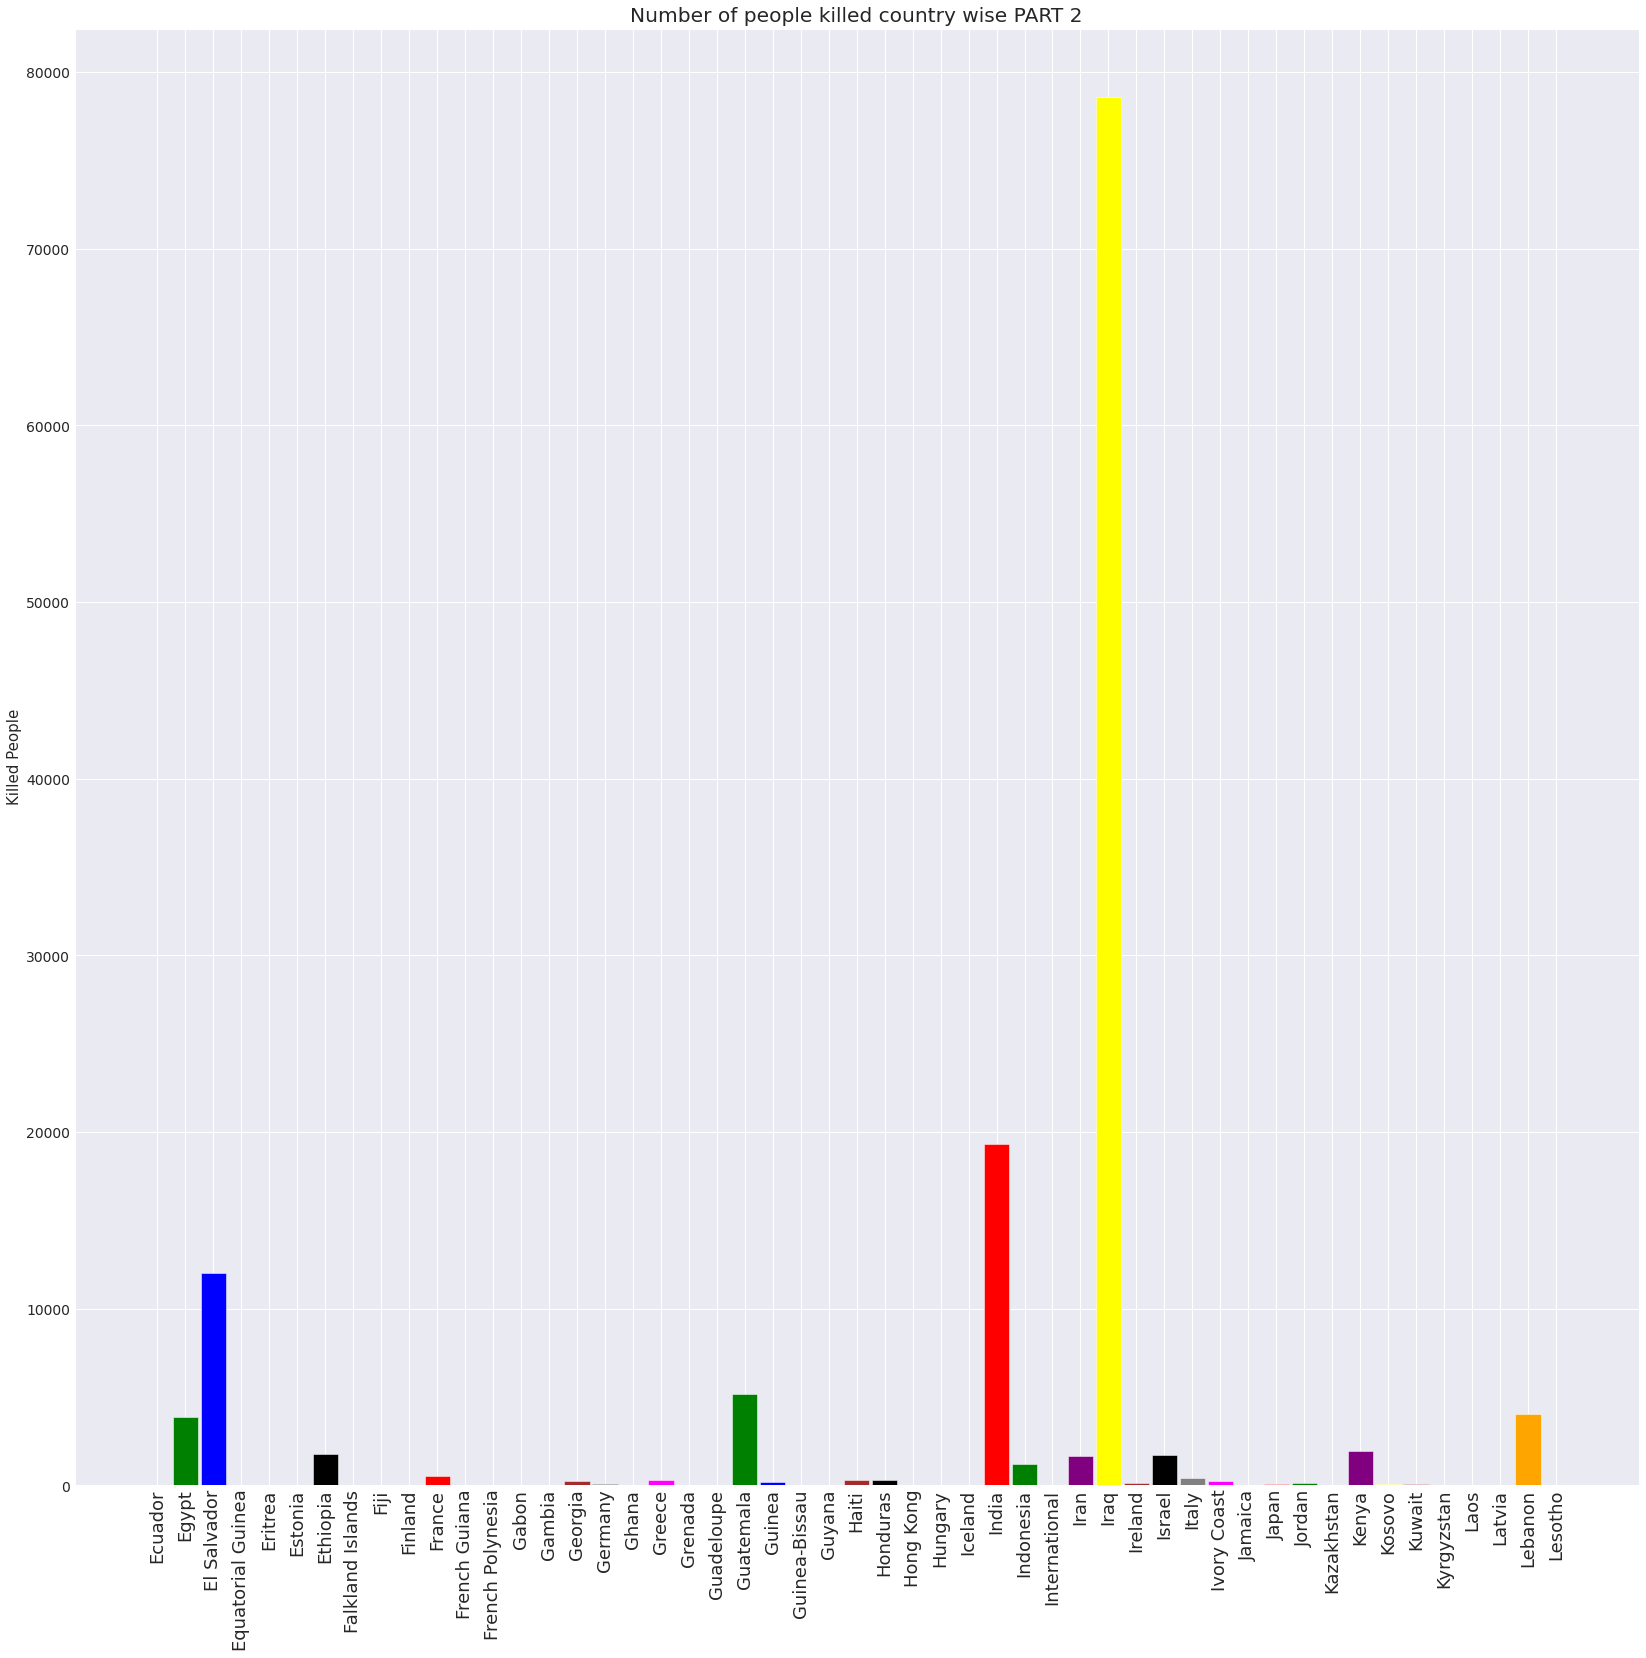

In [ ]:

labels = countryDeathFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryDeathFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed country wise PART 2')
plt.show()

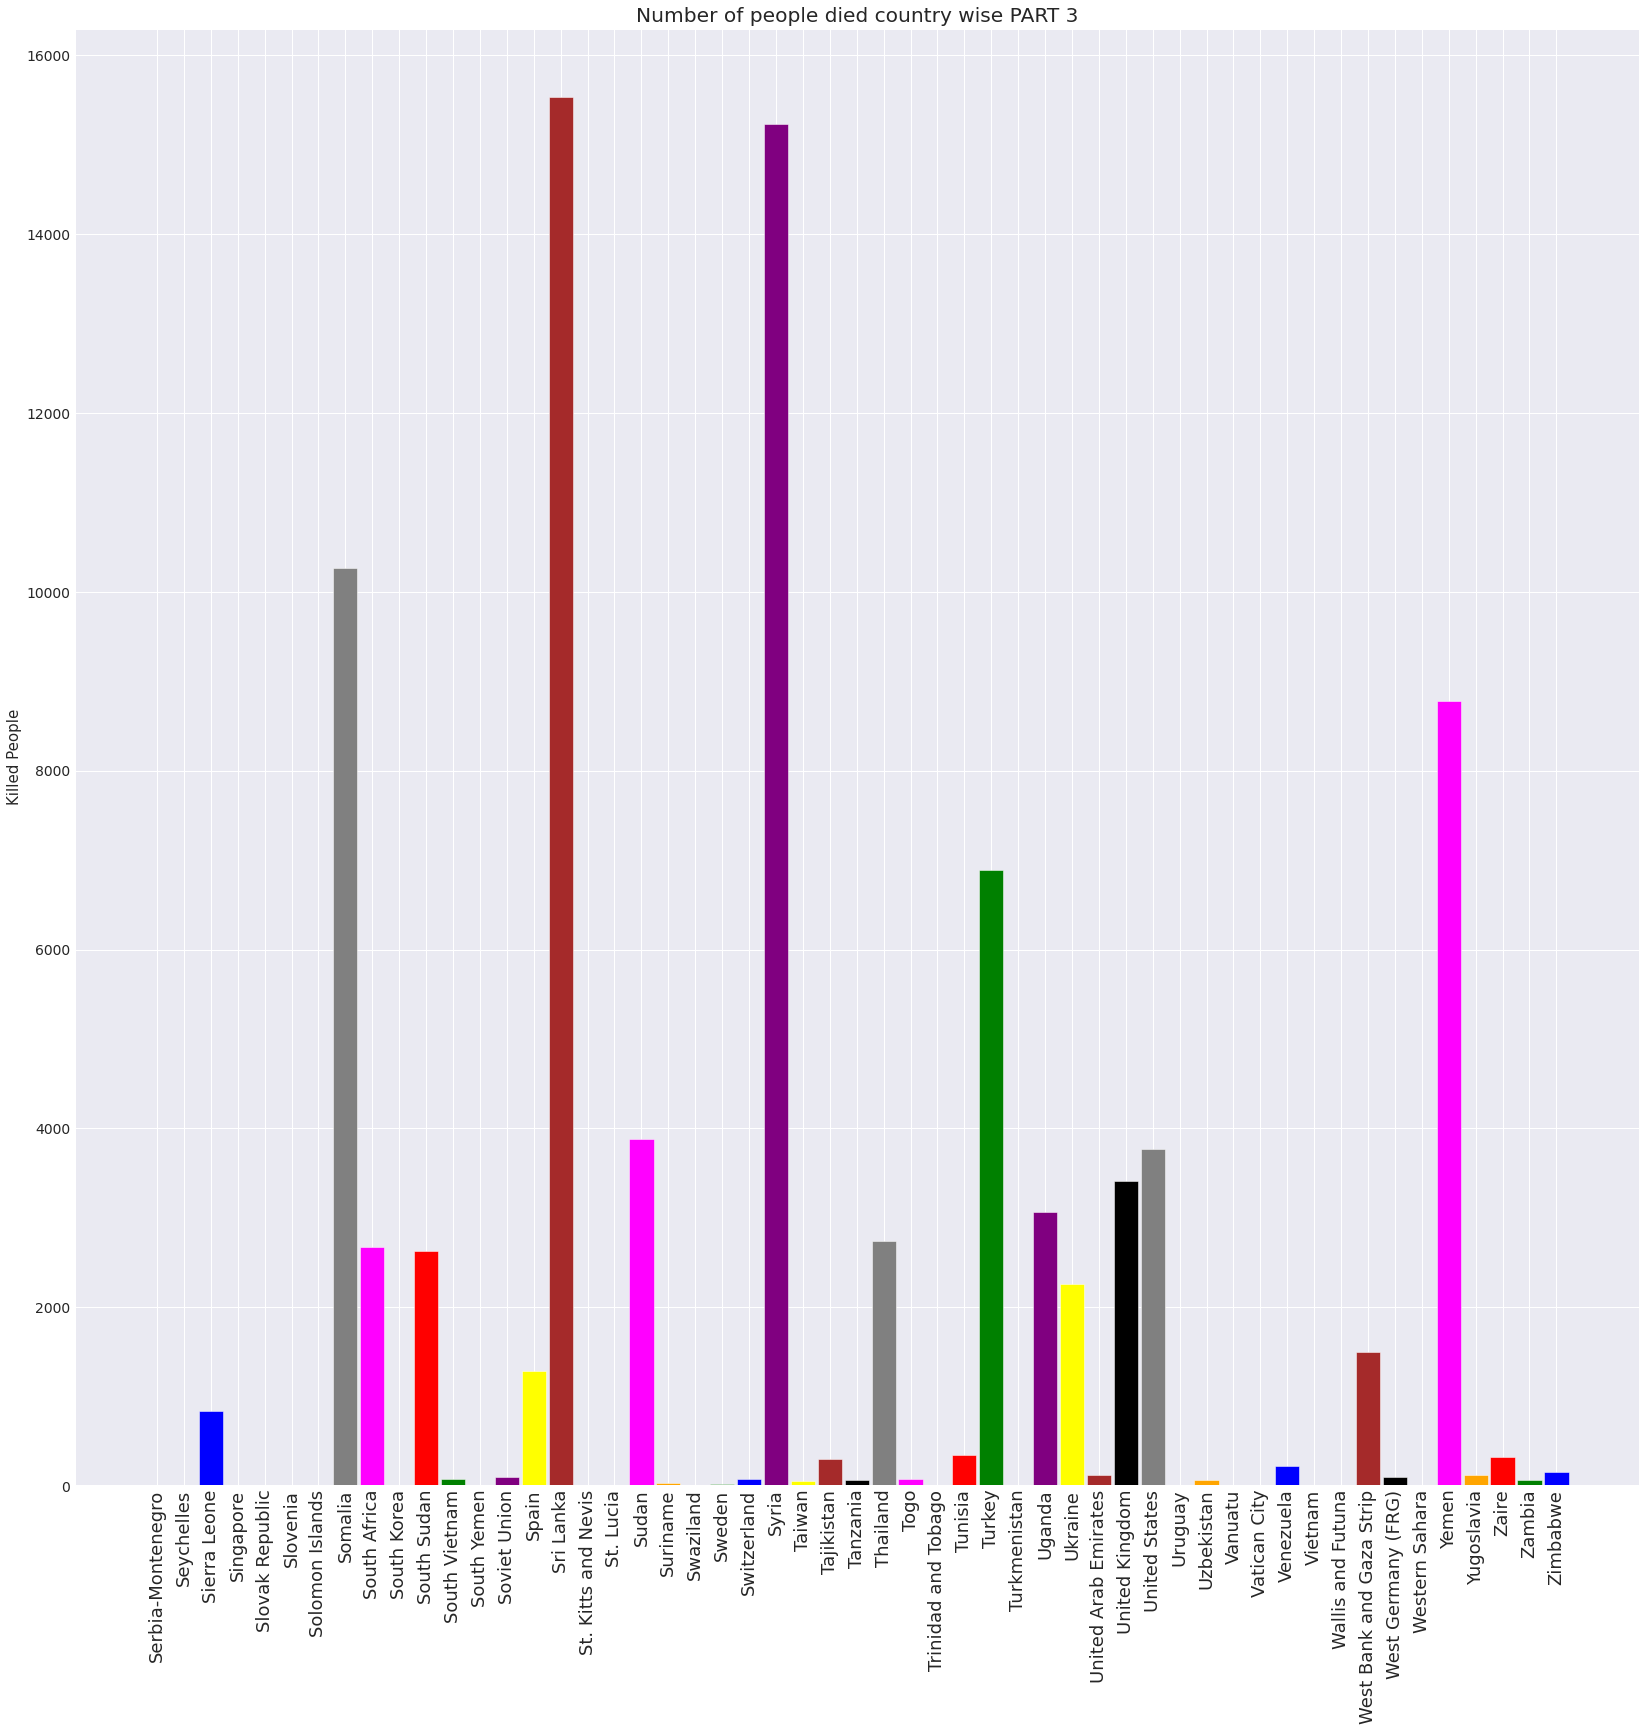

In [ ]:

labels = countryDeathFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryDeathFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people died country wise PART 3')
plt.show()

#**Conclusion:**



**Country with the most attacks**: Iraq

**City with the most attacks**: Baghdad

**Region with the most attacks**: Middle East & North Africa

**Year with the most attacks**: 2014

**Month with the most attacks**: 5

**Most common target type**: Private citizens and property

**Most common attack type resulted in highest number fatal cases**: Bombing/Explosion

Thus, terrorist attacks in the Middle East, Northern Africa and some parts of South East Asia have been observed as most frequent, fatal and serious terrorist attacks. India, Sri Lanka along with several Arab and Islamic countries like  have also been found under the area of severe damages casued by the attacks.